# Fast Food Anaylsis - Data Project 
**Creator: Cesar Gutierrez**                 
**Contact Information: Cesargutierrez.email@gmail.com**             
**Data: https://www.kaggle.com/datasets/rishidamarla/fast-food-restaurants-in-america**

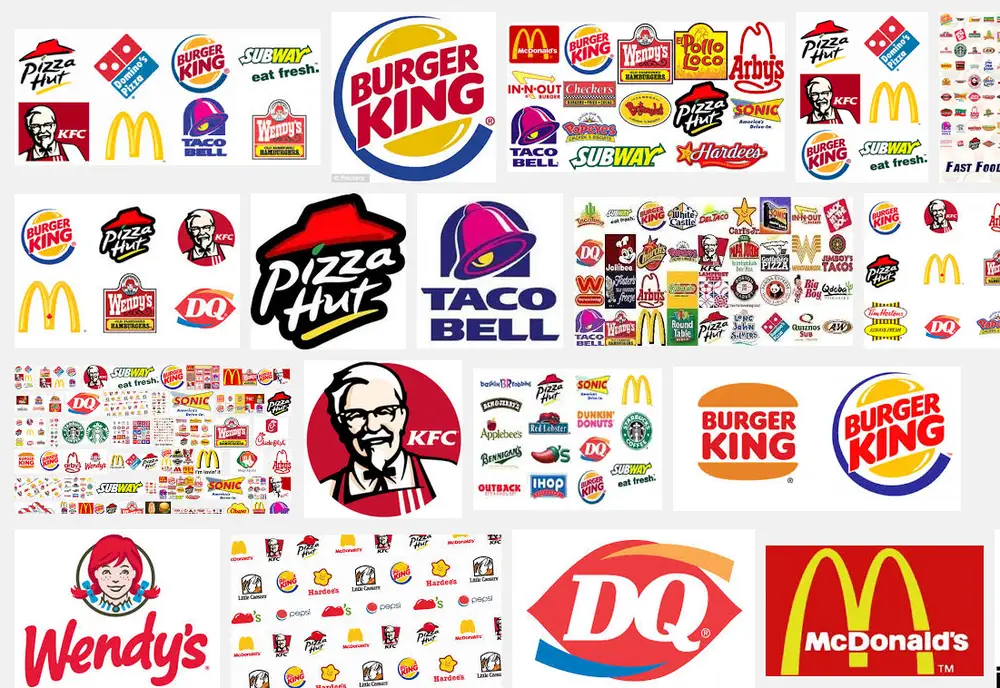

**Importing the needed libraries:**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

**Loading the data into a dataframe:**

In [3]:
data = pd.read_csv('FastFoodRestaurants.csv')
data

address                    city country  \
0               324 Main St                 Massena      US   
1           530 Clinton Ave  Washington Court House      US   
2      408 Market Square Dr               Maysville      US   
3     6098 State Highway 37                 Massena      US   
4           139 Columbus Rd                  Athens      US   
...                     ...                     ...     ...   
9995  3013 Peach Orchard Rd                 Augusta      US   
9996      678 Northwest Hwy                    Cary      US   
9997           1708 Main St                Longmont      US   
9998      67740 Highway 111          Cathedral City      US   
9999    5701 E La Palma Ave                 Anaheim      US   

                                                   keys   latitude  \
0                   us/ny/massena/324mainst/-1161002137  44.921300   
1     us/oh/washingtoncourthouse/530clintonave/-7914...  39.532550   
2          us/ky/maysville/408marketsquaredr/1051460804  38.627360   
3          us/ny/massena/6098statehighway37/-1161002137  44.950080   
4                  us/oh/athens/139columbusrd/990890980  39.351550   
...                                                 ...        ...   
9995        us/ga/augusta/3013peachorchardrd/-791445730  33.415257   
9996               us/il/cary/678northwesthwy/787691191  42.217300   
9997               us/co/longmont/1708mainst/-448666054  40.189190   
9998     us/ca/cathedralcity/67740highway111/-981164808  33.788640   
9999            us/ca/anaheim/5701elapalmaave/554191587  33.860074   

       longitude                         name postalCode province  \
0     -74.890210                   McDonald's      13662       NY   
1     -83.445260                      Wendy's      43160       OH   
2     -83.791410             Frisch's Big Boy      41056       KY   
3     -74.845530                   McDonald's      13662       NY   
4     -82.097280              OMG! Rotisserie      45701       OH   
...          ...                          ...        ...      ...   
9995  -82.024531                      Wendy's      30906       GA   
9996  -88.255800  Lee's Oriental Martial Arts      60013       IL   
9997 -105.101720                    Five Guys      80501       CO   
9998 -116.482150                El Pollo Loco      92234       CA   
9999 -117.789762                   Carl's Jr.      92807       CA   

                                               websites  
0     http://mcdonalds.com,http://www.mcdonalds.com/...  
1                                 http://www.wendys.com  
2     http://www.frischs.com,https://www.frischs.com...  
3     http://mcdonalds.com,http://www.mcdonalds.com/...  
4     http://www.omgrotisserie.com,http://omgrotisse...  
...                                                 ...  
9995            http://www.wendys.com,http://wendys.com  
9996                           http://www.mcdonalds.com  
9997                                http://fiveguys.com  
9998  http://www.elpolloloco.com,http://elpolloloco.com  
9999                             http://www.carlsjr.com  

[10000 rows x 10 columns]

# All Fast Food Data

**Here we create a list of just the different types of provinces in the data set:**

In [4]:
# Count the occurrences of each home planet
province_counts = data['province'].value_counts()
province_counts

CA         676
TX         634
OH         543
FL         471
IN         379
IL         363
NC         358
GA         347
MO         334
KY         332
VA         327
PA         283
NY         269
MI         251
TN         245
SC         238
LA         237
AL         236
WA         209
AZ         208
OK         208
WI         186
IA         166
UT         159
MD         159
CO         158
NJ         151
AR         151
NM         149
MN         148
NV         135
MA         131
OR         114
SD         105
KS         103
ID          99
CT          96
WV          93
NE          92
MS          82
ND          50
ME          44
VT          43
WY          41
HI          40
NH          36
DE          32
MT          25
RI          24
DC          21
AK          14
Co Spgs      5
Name: province, dtype: int64

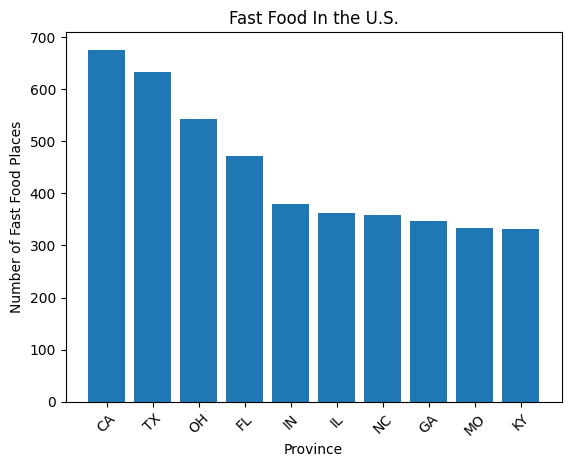

In [5]:
# Plot the states with the most fast food places
# Here we are just going to find the top ten states
plt.bar(province_counts.index[:10], province_counts[:10])
plt.xlabel('Province')
plt.ylabel('Number of Fast Food Places')
plt.title('Fast Food In the U.S.')
plt.xticks(rotation=45)
plt.show()

As we can see the state with the most fast food places is California. 

**Let's see which fast food place has the most locations:**

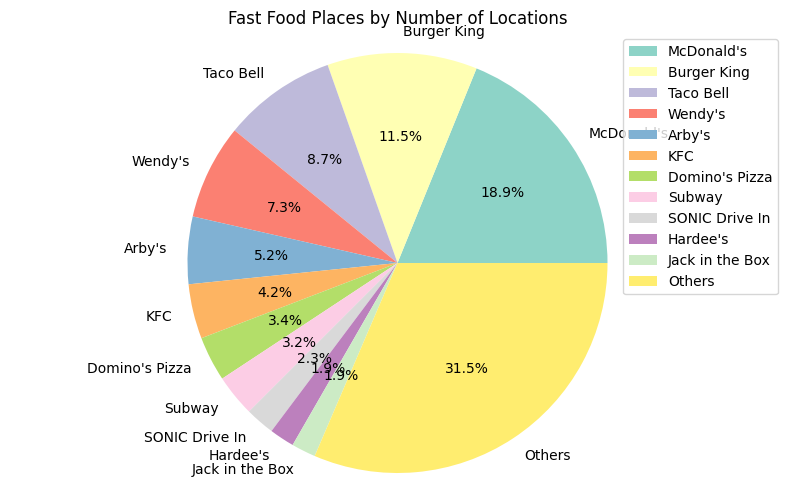

In [6]:
# Count the number of locations for each fast food place
locations_count = data['name'].value_counts()

# Set a threshold for grouping smaller fast food places into "Others"
threshold = 170

# Group smaller places into "Others"
small_places = locations_count[locations_count < threshold]
locations_count['Others'] = small_places.sum()
locations_count = locations_count[locations_count >= threshold]

# Get the top fast food place with the most locations
most_common_place = locations_count.index[0]

# Plot a pie chart
plt.figure(figsize=(10, 6))
colors = plt.cm.Set3(range(len(locations_count)))  # Generate a color map for the slices
patches, texts, autotexts = plt.pie(locations_count, labels=locations_count.index, autopct='%1.1f%%', colors=colors)
plt.title("Fast Food Places by Number of Locations")
plt.axis('equal')

# Create a legend
legend_labels = locations_count.index.tolist()
plt.legend(patches, legend_labels, loc="best")

# Customize the legend colors to match the corresponding slices
for patch, color in zip(patches, colors):
    patch.set_facecolor(color)

plt.show()




Fron the pie chart we can see that McDonald's has the most fad food places within the U.S., followed by Burger King, and Taco Bell. (Also note that the 'Others' section is made up of around the 30 lowest fast food places that had percentages around 1 or less). 

# McDonald's Data

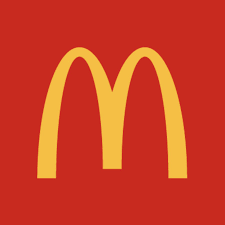

Here is just the McDonald's data.

In [7]:
mcdonalds_df = data[data['name'] == "McDonald's"]
mcdonalds_df

address                city country  \
0               324 Main St             Massena      US   
3     6098 State Highway 37             Massena      US   
7         401 N Jennings St              Saluda      US   
12          1535 NW 50th St       Oklahoma City      US   
15      301 University Blvd          Louisville      US   
...                     ...                 ...     ...   
9962    13749 N Highway 183              Austin      US   
9967       12090 SW Main St            Portland      US   
9969        601 Aberdeen Rd             Hampton      US   
9979      50 New Orleans Rd  Hilton Head Island      US   
9989      1120 S Haynes Ave          Miles City      US   

                                                   keys   latitude  \
0                   us/ny/massena/324mainst/-1161002137  44.921300   
3          us/ny/massena/6098statehighway37/-1161002137  44.950080   
7               us/sc/saluda/401njenningsst/-1161002137  34.005980   
12          us/ok/oklahomacity/1535nw50thst/-1161002137  35.522340   
15       us/ky/louisville/301universityblvd/-1161002137  38.219990   
...                                                 ...        ...   
9962          us/tx/austin/13749nhighway183/-1161002137  30.459690   
9967           us/or/portland/12090swmainst/-1161002137  45.432288   
9969            us/va/hampton/601aberdeenrd/-1161002137  37.012490   
9979  us/sc/hiltonheadisland/50neworleansrd/-1161002137  32.155760   
9989         us/mt/milescity/1120shaynesave/-1161002137  46.397680   

       longitude        name postalCode province  \
0     -74.890210  McDonald's      13662       NY   
3     -74.845530  McDonald's      13662       NY   
7     -81.770400  McDonald's      29138       SC   
12    -97.538200  McDonald's      73118       OK   
15    -85.764824  McDonald's      40208       KY   
...          ...         ...        ...      ...   
9962  -97.793400  McDonald's      78750       TX   
9967 -122.767828  McDonald's      97223       OR   
9969  -76.403590  McDonald's      23661       VA   
9979  -80.759810  McDonald's      29928       SC   
9989 -105.822520  McDonald's      59301       MT   

                                               websites  
0     http://mcdonalds.com,http://www.mcdonalds.com/...  
3     http://mcdonalds.com,http://www.mcdonalds.com/...  
7                              http://www.mcdonalds.com  
12    http://mcdonalds.com,http://www.mcdonalds.com/...  
15    http://mcdonalds.com,http://www.mcdonalds.com/...  
...                                                 ...  
9962     http://t.co/vn89Zbxm,http://www.mcdonalds.com/  
9967                               http://mcdonalds.com  
9969  http://mcdonalds.com,http://www.mcdonalds.com/...  
9979  http://mcdonalds.com,http://www.mcdonalds.com/...  
9989  http://mcdonalds.com,http://www.mcdonalds.com/...  

[1886 rows x 10 columns]

Here is the total amount of McDonald's locations in the U.S.

In [8]:
num_mcdonalds = mcdonalds_df.shape[0]
num_mcdonalds

1886

All the states that have a McDonald's and the amount of resturant in each one.

In [9]:
mcdonalds_state_counts = mcdonalds_df['province'].value_counts()
mcdonalds_state_counts

TX    144
CA    121
OH    102
IN     82
FL     81
IL     76
KY     71
MO     71
VA     66
NY     64
NC     63
PA     62
LA     55
GA     52
OK     50
MI     44
SC     42
TN     39
WA     39
IA     37
NJ     37
WI     35
AL     34
CT     33
MD     32
AZ     32
MN     27
UT     27
AR     25
MA     24
OR     23
CO     19
WV     18
SD     17
VT     16
NV     15
NM     15
ID     14
ME     12
NE     10
KS     10
MS     10
NH      9
ND      7
DE      6
WY      5
DC      4
MT      3
RI      3
AK      2
HI      1
Name: province, dtype: int64

Here is a map with each McDonald's resturant displayed by a pin.

In [10]:
# Create a map centered around the U.S.
us_map = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Iterate over the McDonald's dataset and add markers for each restaurant
for index, row in mcdonalds_df.iterrows():
    name = row['name']
    lat = row['latitude']
    lon = row['longitude']
    address = row['address']
    
    # Create a popup message for each marker
    popup_text = f"<b>{name}</b><br>{address}"
    
    # Add a marker for the McDonald's restaurant
    folium.Marker([lat, lon], popup=popup_text).add_to(us_map)

# Display the map
us_map.save("mcdonalds_locations_map.html")  # Save the map as an HTML file
us_map


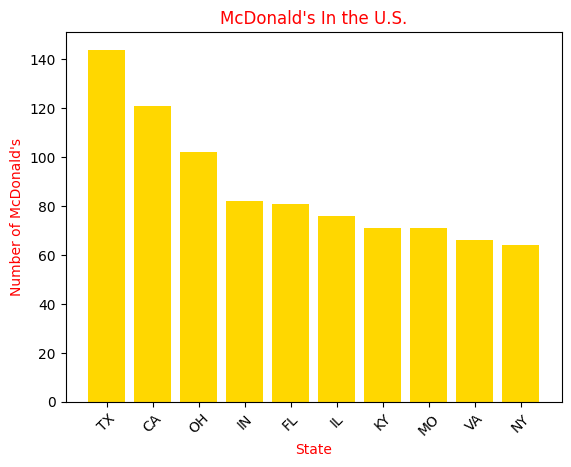

In [11]:
plt.bar(mcdonalds_state_counts.index[:10], mcdonalds_state_counts[:10], color = 'gold')
plt.xlabel('State', color = 'red')
plt.ylabel("Number of McDonald's", color = 'red')
plt.title("McDonald's In the U.S.", color = 'red')
plt.xticks(rotation=45)
plt.show()

As we can see, Texas has the most McDonld's. 

# Burger King Data

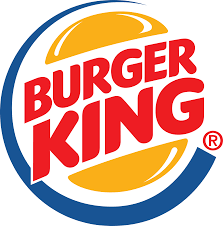

In [12]:
bk_df = data[data['name'] == "Burger King"]
bk_df

address           city country  \
40               982 Macon St  Warner Robins      US   
41     6060 San Mateo Blvd NE    Albuquerque      US   
46            18000 Bagley Rd      Cleveland      US   
63              225 Grant Ave         Auburn      US   
75                 Co-Op City          Bronx      US   
...                       ...            ...     ...   
9950          700 B Dacula Rd         Dacula      US   
9968          114 W Jasper St          Paris      US   
9977        6201 Lapalco Blvd        Marrero      US   
9982       3020 E Sunshine St    Springfield      US   
9984  7100 Coastal Palms Blvd    Panama City      US   

                                                   keys   latitude  \
40            us/ga/warnerrobins/982maconst/-2061630068  32.594950   
41     us/nm/albuquerque/6060sanmateoblvdne/-2061630068  35.144456   
46            us/oh/cleveland/18000bagleyrd/-2061630068  41.373042   
63                 us/ny/auburn/225grantave/-2061630068  42.949870   
75                       us/ny/bronx/opcity/-2061630068  40.869100   
...                                                 ...        ...   
9950              us/ga/dacula/700bdaculard/-2061630068  34.001935   
9968               us/il/paris/114wjasperst/-2061630068  39.603400   
9977          us/la/marrero/6201lapalcoblvd/-2061630068  29.875182   
9982      us/mo/springfield/3020esunshinest/-2061630068  37.180230   
9984  us/fl/panamacity/7100coastalpalmsblvd/-2061630068  30.175100   

       longitude         name postalCode province  \
40    -83.583380  Burger King      31098       GA   
41   -106.585927  Burger King      87109       NM   
46    -81.826072  Burger King      44130       OH   
63    -76.547220  Burger King      13021       NY   
75    -73.824800  Burger King      10475       NY   
...          ...          ...        ...      ...   
9950  -83.911686  Burger King      30019       GA   
9968  -87.695470  Burger King      61944       IL   
9977  -90.114028  Burger King      70072       LA   
9982  -93.234476  Burger King      65804       MO   
9984  -85.760600  Burger King      32408       FL   

                                               websites  
40    http://www.bk.com,https://locations.bk.com/ga/...  
41    http://www.bk.com,https://locations.bk.com/nm/...  
46                                    http://www.bk.com  
63    http://www.bk.com,https://locations.bk.com/ny/...  
75                                    http://www.bk.com  
...                                                 ...  
9950                                  http://www.bk.com  
9968  http://www.bk.com,https://locations.bk.com/il/...  
9977  https://locations.bk.com/la/marrero/6201-lapal...  
9982                                      http://bk.com  
9984  http://www.bk.com,https://locations.bk.com/fl/...  

[1154 rows x 10 columns]

In [13]:
bk_state_counts = bk_df['province'].value_counts()
bk_state_counts

FL         92
OH         72
NY         59
CA         58
IL         56
MI         55
PA         53
TX         47
IN         43
GA         42
VA         40
AL         30
MA         30
WA         29
WI         27
SC         27
LA         26
NC         25
TN         25
CO         24
NJ         23
IA         23
MN         23
KY         21
AZ         16
MD         16
MO         16
KS         15
OR         14
CT         12
NV         10
WV         10
SD         10
UT          8
NE          8
ME          8
ID          7
NM          7
ND          6
OK          6
RI          5
AR          5
HI          5
MS          5
WY          4
NH          4
VT          3
DE          3
Co Spgs     1
Name: province, dtype: int64

In [14]:
# Create a map centered around the U.S.
us_map = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Iterate over the Burger King's dataset and add markers for each restaurant
for index, row in bk_df.iterrows():
    name = row['name']
    lat = row['latitude']
    lon = row['longitude']
    address = row['address']
    
    # Create a popup message for each marker
    popup_text = f"<b>{name}</b><br>{address}"
    
    # Add a marker for the McDonald's restaurant
    folium.Marker([lat, lon], popup=popup_text).add_to(us_map)

# Display the map
us_map.save("bk_locations_map.html")  # Save the map as an HTML file
us_map


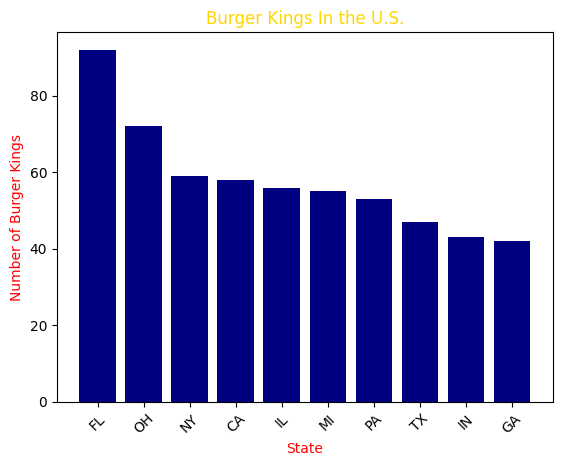

In [15]:
plt.bar(bk_state_counts.index[:10], bk_state_counts[:10], color = 'navy')
plt.xlabel('State', color = 'red')
plt.ylabel("Number of Burger Kings", color = 'red')
plt.title("Burger Kings In the U.S.", color = 'gold')
plt.xticks(rotation=45)
plt.show()

# Taco Bell

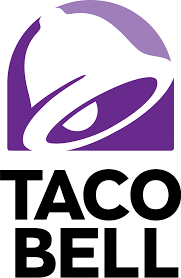

In [16]:
tc_df = data[data['name'] == "Taco Bell"]
tc_df

address         city country  \
17          101 Thomas Garst Ln       Leland      US   
30          105 Business Loop W    Jamestown      US   
56             100 Northside Dr   Bennington      US   
67           344 S Service Rd E     Sullivan      US   
69                2124 S 1st St       Yakima      US   
...                         ...          ...     ...   
9828          707 W Victory Way        Craig      US   
9878      507 E Mount Vernon St         Nixa      US   
9933             1443 E 14th St  San Leandro      US   
9939  10917 Carolina Place Pkwy    Pineville      US   
9956   11620 SE Mill Plain Blvd    Vancouver      US   

                                                   keys   latitude  \
17             us/nc/leland/101thomasgarstln/-864103396  34.233890   
30          us/nd/jamestown/105businessloopw/-864103396  46.898997   
56           us/vt/bennington/100northsidedr/-864103396  42.894130   
67             us/mo/sullivan/344sservicerde/-864103396  38.223030   
69                   us/wa/yakima/2124s1stst/-864103396  46.571440   
...                                                 ...        ...   
9828              us/co/craig/707wvictoryway/-864103396  40.514370   
9878            us/mo/nixa/507emountvernonst/-864103396  37.043340   
9933            us/ca/sanleandro/1443e14thst/-864103396  37.723754   
9939  us/nc/pineville/10917carolinaplacepkwy/-864103396  35.085516   
9956    us/wa/vancouver/11620semillplainblvd/-864103396  45.621193   

       longitude       name postalCode province  \
17    -77.995440  Taco Bell      28451       NC   
30    -98.707788  Taco Bell      58401       ND   
56    -73.203160  Taco Bell       5201       VT   
67    -91.156960  Taco Bell      63080       MO   
69   -120.488250  Taco Bell      98903       WA   
...          ...        ...        ...      ...   
9828 -107.556150  Taco Bell      81625       CO   
9878  -93.288822  Taco Bell      65714       MO   
9933 -122.154658  Taco Bell      94577       CA   
9939  -80.879508  Taco Bell      28134       NC   
9956 -122.552361  Taco Bell      98684       WA   

                                               websites  
17    http://www.tacobell.com,https://locations.taco...  
30    http://www.tacobell.com,https://locations.taco...  
56    http://www.tacobell.com,https://locations.taco...  
67    http://www.tacobell.com,https://locations.taco...  
69    https://locations.tacobell.com/wa/yakima/2124-...  
...                                                 ...  
9828  https://locations.tacobell.com/co/craig/707-we...  
9878                                                NaN  
9933                                http://tacobell.com  
9939  http://www.tacobell.com,http://locations.tacob...  
9956        http://www.tacobell.com,http://tacobell.com  

[873 rows x 10 columns]

In [17]:
tc_state_counts = tc_df['province'].value_counts()
tc_state_counts

CA         70
TX         63
OH         53
IN         49
IL         48
MO         43
NC         37
KY         31
AL         31
MI         28
VA         28
GA         26
FL         24
LA         24
NY         23
WA         20
OK         20
WI         18
TN         16
AZ         16
NM         15
CO         14
AR         14
SC         13
PA         13
OR         12
IA         12
MD         11
ID         10
MN          9
CT          8
UT          8
MS          8
NV          7
MA          6
VT          5
NJ          5
NE          5
SD          4
WV          4
WY          4
KS          3
ND          3
NH          3
DE          2
MT          2
HI          2
ME          1
DC          1
Co Spgs     1
Name: province, dtype: int64

In [18]:
us_map = folium.Map(location=[37.0902, -95.7129], zoom_start=4)
for index, row in tc_df.iterrows():
    name = row['name']
    lat = row['latitude']
    lon = row['longitude']
    address = row['address']
    popup_text = f"<b>{name}</b><br>{address}"
    folium.Marker([lat, lon], popup=popup_text).add_to(us_map)

us_map.save("tc_locations_map.html")  # Save the map as an HTML file
us_map

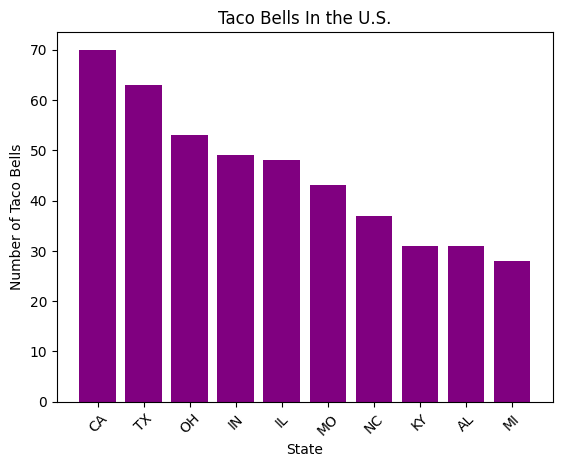

In [19]:
plt.bar(tc_state_counts.index[:10], tc_state_counts[:10], color = 'purple')
plt.xlabel('State', color = 'black')
plt.ylabel("Number of Taco Bells", color = 'black')
plt.title("Taco Bells In the U.S.", color = 'black')
plt.xticks(rotation=45)
plt.show()

# Illinois 

In [20]:
IL_df = data[data['province'] == "IL"]
IL_df

address          city country  \
226           837 W Morton Ave  Jacksonville      US   
231             80 Clinton Plz       Clinton      US   
234          201 Maple City Dr      Monmouth      US   
237             1212 W Main St     Fairfield      US   
239   550 E Industrial Park Rd   Murphysboro      US   
...                        ...           ...     ...   
9889          500 W Madison St       Chicago      US   
9934          570 N Schmale Rd  Carol Stream      US   
9947             801 N Lake St        Aurora      US   
9968           114 W Jasper St         Paris      US   
9996         678 Northwest Hwy          Cary      US   

                                                   keys   latitude  longitude  \
226         us/il/jacksonville/837wmortonave/-864103396  39.723201 -90.240464   
231               us/il/clinton/80clintonplz/-864103396  40.147140 -88.977220   
234            us/il/monmouth/201maplecitydr/-864103396  40.910700 -90.644830   
237             us/il/fairfield/1212wmainst/-1161002137  38.379570 -88.376970   
239   us/il/murphysboro/550eindustrialparkrd/-116100...  37.788390 -89.325240   
...                                                 ...        ...        ...   
9889               us/il/chicago/500wmadisonst/93075755  41.882021 -87.639888   
9934         us/il/carolstream/570nschmalerd/1436234466  41.918030 -88.101800   
9947                 us/il/aurora/801nlakest/-791445730  41.772796 -88.313816   
9968               us/il/paris/114wjasperst/-2061630068  39.603400 -87.695470   
9996               us/il/cary/678northwesthwy/787691191  42.217300 -88.255800   

                             name postalCode province  \
226                     Taco Bell      62650       IL   
231                     Taco Bell      61727       IL   
234                     Taco Bell      61462       IL   
237                    McDonald's      62837       IL   
239                    McDonald's      62966       IL   
...                           ...        ...      ...   
9889                       Arby's      60661       IL   
9934                     Charkies      60188       IL   
9947                      Wendy's      60506       IL   
9968                  Burger King      61944       IL   
9996  Lee's Oriental Martial Arts      60013       IL   

                                               websites  
226   http://www.tacobell.com,https://locations.taco...  
231   http://www.tacobell.com,https://locations.taco...  
234   http://www.tacobell.com,https://locations.taco...  
237   http://www.mcdonalds.com,http://www.mcdonalds....  
239   http://mcdonalds.com,http://www.mcdonalds.com/...  
...                                                 ...  
9889                               http://www.arbys.com  
9934        http://charkies.com,http://www.charkies.com  
9947                              http://www.wendys.com  
9968  http://www.bk.com,https://locations.bk.com/il/...  
9996                           http://www.mcdonalds.com  

[363 rows x 10 columns]

In [21]:
IL_counts = IL_df['name'].value_counts()
IL_counts

McDonald's                     76
Burger King                    56
Taco Bell                      48
Wendy's                        22
Subway                         18
                               ..
Mc Donald's                     1
A&W All-American Food           1
Mcdonalds                       1
Chuck Wagon                     1
Lee's Oriental Martial Arts     1
Name: name, Length: 73, dtype: int64

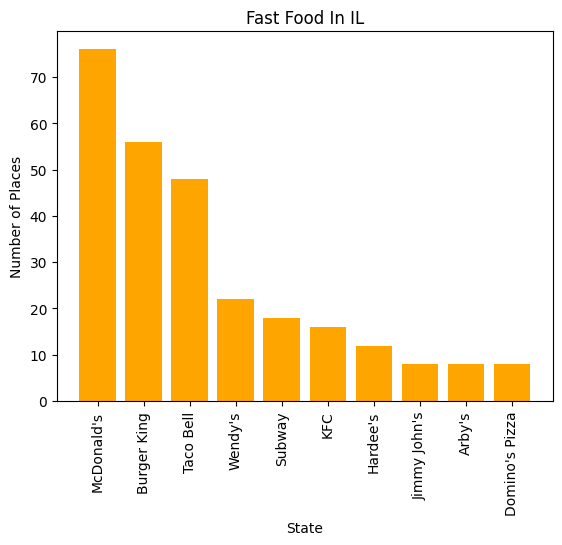

In [22]:
plt.bar(IL_counts.index[:10], IL_counts[:10], color = 'orange')
plt.xlabel('State', color = 'black')
plt.ylabel("Number of Places", color = 'black')
plt.title("Fast Food In IL", color = 'black')
plt.xticks(rotation=90)
plt.show()

In [23]:
# Define a color dictionary mapping restaurant chains to colors
color_dict = {
    'McDonald\'s': 'red',
    'Burger King': 'blue',
    'KFC': 'orange',
    'Wendy\'s': 'green', 
    'Taco Bell': 'purple',
    'Arby\'s': 'maroon', 
    'Subway': 'Yellow', 
    'SONIC Drive In': 'teal',
    'Domino\'s Pizza': 'gold',
    'Hardee\'s' : 'magenta',
    'Jack in the Box': 'olive'
    # Add more restaurant chains and their corresponding colors if needed
}

# Create a map centered around Illinois
il_map = folium.Map(location=[40.0, -89.0], zoom_start=7)  # Adjust the coordinates and zoom level as desired

# Iterate over the fast food locations in Illinois and add markers for each restaurant
for index, row in IL_df.iterrows():
    name = row['name']
    lat = row['latitude']
    lon = row['longitude']
    address = row['address']

    # Create a popup message for each marker
    popup_text = f"<b>{name}</b><br>{address}"
 
    # Get the color for the current restaurant chain
    color = color_dict.get(name, 'gray')  # Default to gray if color is not defined for the chain

    # Add a marker for the fast food restaurant with the corresponding color
    folium.Marker([lat, lon], popup=popup_text, icon=folium.Icon(color=color)).add_to(il_map)

# Display the map
il_map


C:\Users\Cesar Gutierrez\AppData\Local\Temp\ipykernel_15972\903070303.py:34: UserWarning: color argument of Icon should be one of: {'blue', 'gray', 'orange', 'purple', 'lightgreen', 'white', 'beige', 'lightred', 'green', 'darkblue', 'darkpurple', 'red', 'cadetblue', 'lightblue', 'black', 'darkgreen', 'pink', 'darkred', 'lightgray'}.
  folium.Marker([lat, lon], popup=popup_text, icon=folium.Icon(color=color)).add_to(il_map)
